In [ ]:
#!pip install konlpy

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
from konlpy.tag import Twitter 

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [ ]:
import os
print(os.listdir('/content/gdriv/My Drive/Colab Notebooks/Data'))

['datasets_19_420_Iris.csv', 'train_car.csv', 'test_car.csv', 'stock.csv', 'cars_part_quality.csv', 'term_data.csv', 'RandomForest_result.csv', 'quality_only.csv', 'titanic.csv', 'titanic_term_without_y.csv', 'fine_dust_without_y.csv', 'fine_dust.csv', 'HW#10.csv', 'gear', 'News.csv', 'BCI.csv']


In [ ]:
news = pd.read_csv("/content/gdriv/My Drive/Colab Notebooks/Data/News.csv", encoding='utf-8')
print(news.columns)

Index(['뉴스식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')


In [ ]:
import re
from konlpy.tag import Komoran
komoran = Komoran()

from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
token_list = []
for idx, text in enumerate(news['본문']):
  if idx < 1000:
    print('[Progress: {}/{}]'.format((idx+1),1000))
    result = hangul.sub('', text)
    for token in kkma.pos(result):
      if token[1] == 'NNG':
        if len(token[0])>1:
          token_list.append(token[0])

[Progress: 1/1000]
[Progress: 2/1000]
[Progress: 3/1000]
[Progress: 4/1000]
[Progress: 5/1000]
[Progress: 6/1000]
[Progress: 7/1000]
[Progress: 8/1000]
[Progress: 9/1000]
[Progress: 10/1000]
[Progress: 11/1000]
[Progress: 12/1000]
[Progress: 13/1000]
[Progress: 14/1000]
[Progress: 15/1000]
[Progress: 16/1000]
[Progress: 17/1000]
[Progress: 18/1000]
[Progress: 19/1000]
[Progress: 20/1000]
[Progress: 21/1000]
[Progress: 22/1000]
[Progress: 23/1000]
[Progress: 24/1000]
[Progress: 25/1000]
[Progress: 26/1000]
[Progress: 27/1000]
[Progress: 28/1000]
[Progress: 29/1000]
[Progress: 30/1000]
[Progress: 31/1000]
[Progress: 32/1000]
[Progress: 33/1000]
[Progress: 34/1000]
[Progress: 35/1000]
[Progress: 36/1000]
[Progress: 37/1000]
[Progress: 38/1000]
[Progress: 39/1000]
[Progress: 40/1000]
[Progress: 41/1000]
[Progress: 42/1000]
[Progress: 43/1000]
[Progress: 44/1000]
[Progress: 45/1000]
[Progress: 46/1000]
[Progress: 47/1000]
[Progress: 48/1000]
[Progress: 49/1000]
[Progress: 50/1000]
[Progress

In [ ]:
dt_token_list = pd.DataFrame(token_list)[0].value_counts()
dt_token_list

체결     921
매수     641
거래     603
매도     535
거래량    347
      ... 
인출       1
화두       1
발언       1
모색       1
대유       1
Name: 0, Length: 2721, dtype: int64

In [ ]:
word = dict()
for i in range(len(dt_token_list)):
  word.update({list(dt_token_list.index)[i]:dt_token_list.iloc[0]})
print(word)

{'체결': 921, '매수': 921, '거래': 921, '매도': 921, '거래량': 921, '상승': 921, '강도': 921, '투자': 921, '대비': 921, '오전': 921, '시장': 921, '주가': 921, '증권': 921, '오후': 921, '현재': 921, '거래일': 921, '금융': 921, '기록': 921, '하락': 921, '강세': 921, '기자': 921, '지난해': 921, '주식': 921, '잔량': 921, '올해': 921, '지수': 921, '증시': 921, '전일': 921, '유지': 921, '회전율': 921, '대금': 921, '전망': 921, '코스': 921, '변동': 921, '지분': 921, '거래소': 921, '코스닥': 921, '개장': 921, '기업': 921, '종목': 921, '반전': 921, '국내': 921, '흐름': 921, '증가': 921, '경제': 921, '경기': 921, '기관': 921, '투자자': 921, '외국인': 921, '본부장': 921, '포인트': 921, '최근': 921, '새해': 921, '분기': 921, '우위': 921, '공시': 921, '실적': 921, '이후': 921, '시각': 921, '상장': 921, '개인': 921, '발표': 921, '한국': 921, '마감': 921, '기준': 921, '급증': 921, '이번': 921, '분전': 921, '관계자': 921, '주요': 921, '직전': 921, '업종': 921, '이상': 921, '자산': 921, '투데이': 921, '머니': 921, '산업': 921, '분석': 921, '매매': 921, '보고': 921, '서울': 921, '아시아': 921, '한때': 921, '최대': 921, '연구원': 921, '운용': 921, '주주': 921, '시간': 921, '둔화': 921, '목적': 

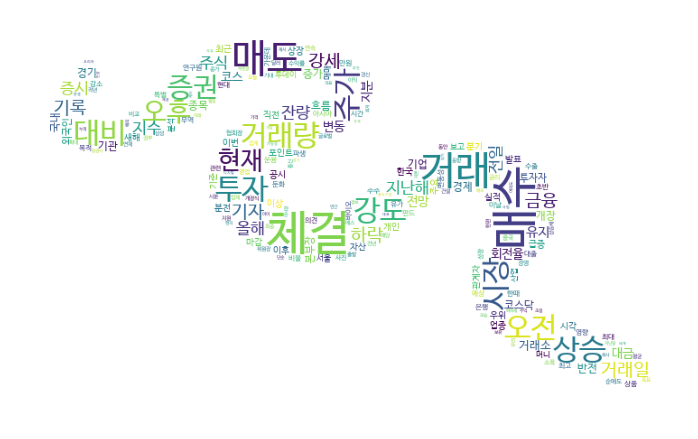

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from PIL import Image

image_mask = np.array(Image.open("/content/gdriv/My Drive/Colab Notebooks/Data/snake.jpg"))

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',mask = image_mask,background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()